B points:
0 Point2D(0, 1) ['B', 'square']
1 Point2D(1, 2) ['B', 'circle']
2 Point2D(3, 4) ['B', 'diamond']
join 0 1
  j1: (-2, 1, 0)
  j2: (-1, -1, 1)
  spread: 9/10
  meet (1/3, 2/3)
join 1 2
  j1: (-4, 2, 4)
  j2: (-2, -2, 6)
  spread: 9/10
  meet (5/3, 4/3)
join 2 0
  j1: (-1, -3, 3)
  j2: (-4, 3, 0)
  spread: 25/34
  meet (3/5, 4/5)
collinear:  True
squares area: -5/6
circles area: 2/5
diamonds area: 16/3
points:  0
elements:  0
B points:
0 Point2D(0, 1) ['B', 'square', 'square']
1 Point2D(3, 4) ['B', 'diamond', 'circle']
2 Point2D(1, 2) ['B', 'circle', 'diamond']
join 0 1
  j1: (-4, 3, 0)
  j2: (-1, -1, 1)
  spread: 49/170
  meet (3/7, 4/7)
join 1 2
  j1: (1, 0, -1)
  j2: (1, 0, -3)
  spread: nan
join 2 0
  j1: (-1, -3, 3)
  j2: (-2, 1, 0)
  spread: 49/50
  meet (3/7, 6/7)
squares area: -5/6


AttributeError: 'Polygon' object has no attribute 'points'

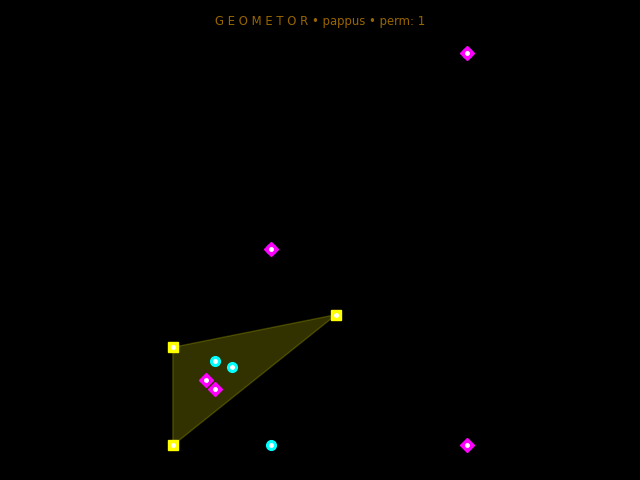

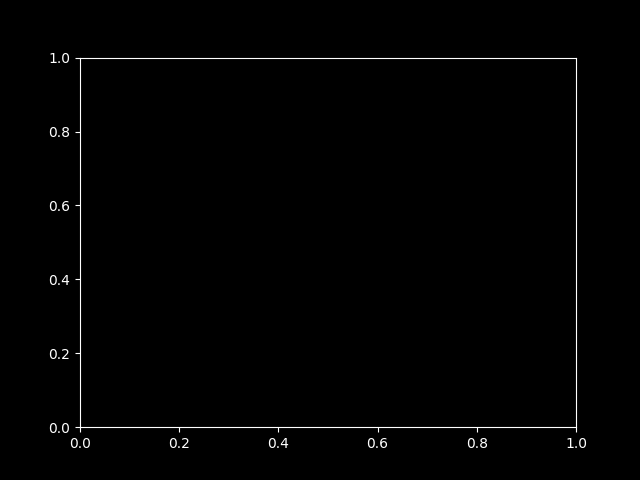

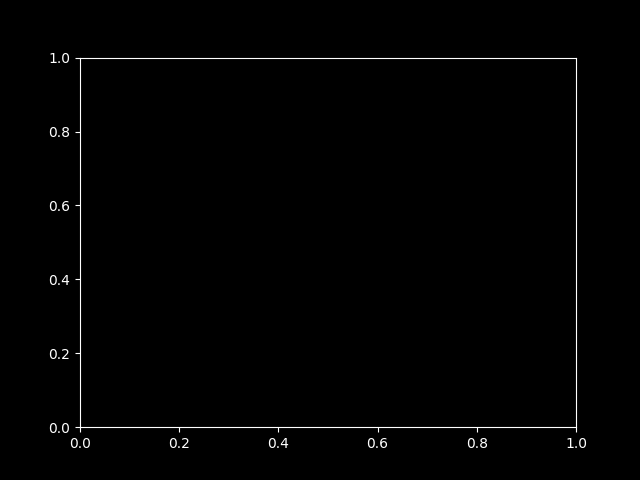

In [1]:
%run run.py
from geometor.pappus import *
from itertools import permutations

%matplotlib widget

for perm_id in range(6):
    pts = []
    elements = []
    
    A = []
    A.append( add_point( point(0, 0, classes=['A', 'square']) ) )
    A.append( add_point( point(1, 0, classes=['A', 'circle']) ) )
    line_a = line(A[0], A[1], classes=['blue']) 
    add_element(line_a)
    x_val = 3
    A.append( add_point( point(x_val, 0, classes=['A', 'diamond']) ) )
    line_a.pts.append(A[-1])

    B = []
    B.append( add_point( point(0, 1, classes=['B']) ) )
    B.append( add_point( point(1, 2, classes=['B']) ) )
    line_b = line(B[0], B[1], classes=['blue']) 
    add_element(line_b)
    x_val = 3
    y_val = line_get_y(line_b, x_val)
    B.append( add_point( point(x_val, y_val, classes=['B']) ) )
    line_b.pts.append(B[-1])

    B_perms = list(permutations(B))

    # perm_id = 0
    B = B_perms[perm_id]
    # print(B)

    # add pt types based on new permuation order
    print('B points:')
    for i, pt in enumerate(B):
        pt.classes.append(types[i])
        print(i, pt, pt.classes)

    set_meet(0, 1, A, B)
    set_meet(1, 2, A, B)
    set_meet(2, 0, A, B)

    meets = get_pts_by_class('meet')

    if len(meets) >= 2:
        pappus_line = line(meets[0], meets[1], classes=['blue', 'pappus'])
        add_element(pappus_line)
    else:
        print('no pappus line')
    if len(meets) == 3:
        pappus_line.pts.append(meets[2])
        print('collinear: ', sp.Point.is_collinear(*meets))



    limx, limy = get_limits_from_points(pts)
    bounds = set_bounds(limx, limy)

    plt.style.use('dark_background')
    plt.cla()
    fig, ax = plt.subplots()

    plt.figure(num=1, figsize=(7.0, 5.0), dpi=150)
    plt.gca().set_aspect('equal')

    # if limx:
    #     plt.gca().set_xlim(limx[0], limx[1])
    # if limy:
    #     plt.gca().set_ylim(limy[0], limy[1])

    title = f'G E O M E T O R • pappus • perm: {perm_id}'
    plt.gca().set_title(title, fontdict={'color': '#960', 'size':'small'})
    plt.axis(False)
    plt.tight_layout()

    plot_elements(elements, bounds)

    plot_points(get_pts_by_class('circle'), **classes['circle'], add_to_cursors=False)
    plot_points(get_pts_by_class('square'), **classes['square'], add_to_cursors=False)
    plot_points(get_pts_by_class('diamond'), **classes['diamond'], add_to_cursors=False)
    plot_points(pts)

    filename = f'pappus/line-{perm_id}.png'
    plt.savefig(filename, dpi=300)


    triangle_sq = polygon(get_pts_by_class('square'))
    if isinstance(triangle_sq, spg.Triangle):
        plot_polygon(triangle_sq, color='#FF03')
        print(f'squares area: {triangle_sq.area}')
    else:
        plot_segment2(triangle_sq, color='#FF09', marker='')

    triangle_cir = polygon(get_pts_by_class('circle'))
    if isinstance(triangle_cir, spg.Triangle):
        plot_polygon(triangle_cir, color='#0FF3')
        print(f'circles area: {triangle_cir.area}')
    else:
        plot_segment2(triangle_cir, color='#0FF9', marker='')

    triangle_dia = polygon(get_pts_by_class('diamond'))
    if isinstance(triangle_dia, spg.Triangle):
        plot_polygon(triangle_dia, color='#F0F3')
        print(f'diamonds area: {triangle_dia.area}')
    else:
        plot_segment2(triangle_dia, color='#F0F9', marker='')

    filename = f'pappus/line-{perm_id}-tri.png'
    plt.savefig(filename, dpi=300)


    print('points: ', len(pts))
    for pt in pts:
        print(f'{str(pt.x): >8} {str(pt.y): >8} {pt.classes} {[el.coefficients for el in pt.parents]}')
    print('elements: ', len(elements))
    for el in elements:
        print(f'{el.coefficients} {el.classes} ')